In [2]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#import tailer
import os
import pandas as pd
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
rank_perc = [950, 990, 995]
#factors = ["BHLHE40", "CEBPB", "CTCF", "E2F4", "EBF1", "ELF1", "ELK1", "ETS1", "FOS", "IRF4", "JunD", "Max", "MEF2A", "MEF2C", "Mxi1", "NFIC", "NFKB", "NFYA", "NFYB", "Nrf1", "NRSF", "PAX5", "PBX3", "POU2F2", "PU1", "RFX5", "RUNX3", "SP1", "SRF", "STAT1", "STAT3", "TCF3", "USF1", "USF2", "YY1", "ZBTB33", "ZEB1", "Znf143"]

factors = ["CTCF","EBF1","SP1","PU1","RUNX3","NFYB","Nrf1","ELF1","NFKB","TCF3"]

factordata = {}
DIR="/storage/pandaman/project/singletons/AgentBind/"
for f in factors:
    # load data
    fdata = pd.read_csv(os.path.join(DIR, f, "scores.tab"), sep="\t", skiprows=1,
                            names=["chrom","start","raw.score","snr.score","rank","core"])
    fdata = fdata[~np.isnan(fdata["raw.score"])]
    fdata = fdata[~np.isnan(fdata["snr.score"])]
    fdata["factor"] = f
    factordata[f] = fdata
    print (f)

CTCF
EBF1
SP1
PU1
RUNX3
NFYB
Nrf1
ELF1
NFKB
TCF3


In [40]:
#trait = "WBC"; gwas = pd.read_csv("/storage/pandaman/project/GWAS/wbc_N172435_narrow_form.tsv.gz", sep="\t")
#trait = "RBC"; gwas = pd.read_csv("/storage/mgymrek/agent-bind/gwas/summstats/RBC_N172952_summ.tab", sep="\t")
#trait = "MCV"; gwas = pd.read_csv("/storage/mgymrek/agent-bind/gwas/summstats/MCV_N172433_summ.tab", sep="\t")
#trait = "Height"; gwas = pd.read_csv("/storage/mgymrek/agent-bind/gwas/summstats/HeightYengo_summ.tab", sep="\t")
trait = "IBD"; gwas = pd.read_csv("/storage/mgymrek/agent-bind/gwas/summstats/EUR.IBD_summ.tab", sep="\t")
gwas["CHR"] = gwas["CHR"].apply(lambda x: "chr"+str(x))
gwas["BP"] = gwas["BP"].apply(lambda x: x-1)
gwas = gwas.rename(columns={"CHR": "chrom", "BP": "start"})

In [41]:
e

CTCF
EBF1
SP1
PU1
RUNX3
NFYB
Nrf1
ELF1
NFKB
TCF3


In [42]:
bins = [0, 0.00025, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5]

In [43]:
gwd["SP1"].head()

chrom      start  raw.score  snr.score    rank  core factor REF ALT  \
66325   chr3  101498076   0.000333  23.356206  1000.0     0    SP1   A   G   
42568   chr3  133292101   0.000237  20.946120  1000.0     0    SP1   T   C   
291     chr1   17380652   0.000102  14.370318  1000.0     0    SP1   A   C   
51712  chr19    7633564   0.001314  40.433654  1000.0     0    SP1   C   G   
99372  chr16     691812   0.000609  31.296192  1000.0     0    SP1   C   G   

        MLOG10P  MA_FREQ  
66325  0.006564  0.06900  
42568  0.966174  0.01010  
291    0.066361  0.00627  
51712  0.361311  0.14200  
99372  0.238674  0.00734

3538 622 3331
713 622 666
397 622 372


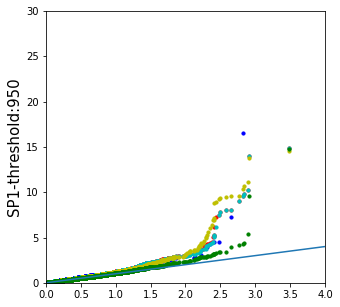

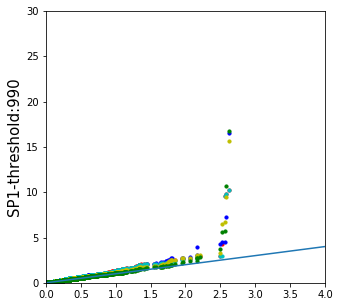

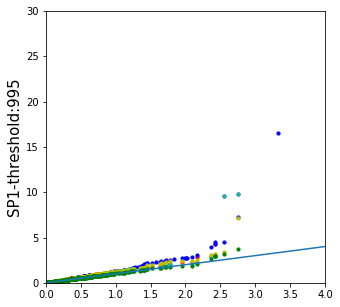

In [44]:
import random
from math import log10

for f in factors:
    if f != "SP1":
        continue
    for perc_index in range(len(rank_perc)):
        high_scored_ab = gwd[f][gwd[f]["rank"] >= rank_perc[perc_index]]
        core = gwd[f][gwd[f]["core"] == 1]
        noncore = high_scored_ab[high_scored_ab["core"] == 0]
        print (high_scored_ab.shape[0], core.shape[0], noncore.shape[0])
        # control - same MA_FREA distribution
        dist, _ = numpy.histogram(high_scored_ab["MA_FREQ"].tolist(), bins=bins)
        control_list = []
        control_list_all = []
        for bin_index in range(len(bins)-1):
            lower, upper = bins[bin_index], bins[bin_index + 1]
            n_samples = dist[bin_index]
            control_list.append((gwd[f][(gwd[f]["MA_FREQ"] >= lower) & (gwd[f]["MA_FREQ"] < upper)]).sample(n_samples))
            control_list_all.append((gwas[(gwas["MA_FREQ"] >= lower) & (gwas["MA_FREQ"] < upper)]).sample(n_samples))
        control = pd.concat(control_list)
        control_all = pd.concat(control_list_all)
                
        s_high_scored_ab = high_scored_ab["MLOG10P"]
        s_core = core["MLOG10P"]
        s_noncore = noncore["MLOG10P"]
        s_ct = control["MLOG10P"]
        s_ct_all = control_all["MLOG10P"]

        
        s_random = [-log10(random.random()) for _ in range(max(high_scored_ab.shape[0], core.shape[0]))]
        s_random_ab = s_random[:high_scored_ab.shape[0]]
        s_random_core = s_random[:core.shape[0]]
        s_random_noncore = s_random[:noncore.shape[0]]
        
        y_points_ab = sorted(s_high_scored_ab.values.tolist())
        y_points_core = sorted(s_core.values.tolist())
        y_points_ct = sorted(s_ct.values.tolist())
        y_points_noncore = sorted(s_noncore.values.tolist())
        y_points_ct_all = sorted(s_ct_all.values.tolist())
        x_points_ab = sorted(s_random_ab)
        x_points_core = sorted(s_random_core)
        x_points_noncore = sorted(s_random_noncore)
        
        fig = plt.figure()
        fig.set_size_inches((5, 5))
        ax = fig.add_subplot(111)
        ax.scatter(x_points_ab, y_points_ab, c="r", s=10)
        ax.scatter(x_points_core, y_points_core, c="b", s=10)
        ax.scatter(x_points_noncore, y_points_noncore, c="c", s=10)
        ax.scatter(x_points_ab, y_points_ct, c="y", s=10)
        ax.scatter(x_points_ab, y_points_ct_all, c="g", s=10)
        ax.set_ylabel("%s-threshold:%d" %(f, rank_perc[perc_index]), size=15)
        ((xmin,xmax), (ymin,ymax)) = ((0, 4), (0, 30))
        ax.add_line(matplotlib.lines.Line2D([ymin,ymax], [ymin,ymax]))
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])

In [45]:
results = gwd["SP1"][gwd["SP1"]["rank"] >= rank_perc[0]]
results = results.sort_values("MLOG10P", ascending=False)
#with open("/storage/pandaman/project/GWAS/high_scored.csv", 'w') as ofile:
#    ofile.write(results.to_csv(index=False))

In [46]:
results

chrom      start  raw.score  snr.score   rank  core factor REF ALT  \
15621   chr17   37912376   0.000249   9.412739  981.0     0    SP1   T   C   
44350    chr6   32806552   0.000119   5.075731  963.0     0    SP1   A   G   
3722     chr3   49761570   0.000082  18.527810  991.0     0    SP1   A   G   
68678    chr9  139305023   0.000043  14.861786  997.0     0    SP1   A   G   
114781   chr9  139377498   0.000057  25.171382  998.0     0    SP1   A   G   
...       ...        ...        ...        ...    ...   ...    ...  ..  ..   
113159   chr9  130965538   0.000019   3.460992  960.0     0    SP1   A   G   
19832   chr20   61640655   0.000057   7.548926  987.0     0    SP1   A   G   
54339    chr1  198590765   0.000262  12.527613  993.0     0    SP1   T   G   
71914   chr19   34625544   0.000060   9.399262  998.0     0    SP1   C   G   
109201  chr17   18684475   0.000140  10.859789  998.0     0    SP1   A   G   

          MLOG10P  MA_FREQ  
15621   14.869700   0.4950  
44350   13.989300   0.0125  
3722    10.290000   0.4470  
68678    9.759200   0.2650  
114781   9.598080   0.2900  
...           ...      ...  
113159   0.000608   0.0211  
19832    0.000521   0.0165  
54339    0.000435   0.0332  
71914    0.000391   0.3420  
109201   0.000348   0.0270  

[3538 rows x 11 columns]

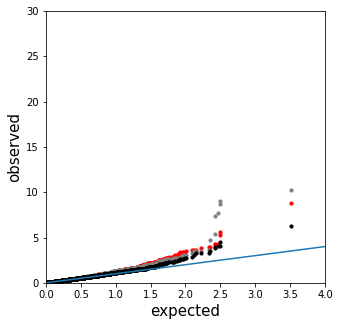

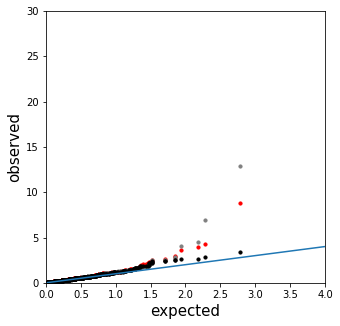

In [47]:
for f in factors:
    if f != "Nrf1":
        continue
    for perc_index in [0,1]:
        high_scored_ab = gwd[f][gwd[f]["rank"] >= rank_perc[perc_index]]

        # control - same MA_FREA distribution
        dist, _ = numpy.histogram(high_scored_ab["MA_FREQ"].tolist(), bins=bins)
        control_list = []
        control_list_all = []
        for bin_index in range(len(bins)-1):
            lower, upper = bins[bin_index], bins[bin_index + 1]
            n_samples = dist[bin_index]
            control_list.append((gwd[f][(gwd[f]["MA_FREQ"] >= lower) & (gwd[f]["MA_FREQ"] < upper)]).sample(n_samples))
            control_list_all.append((gwas[(gwas["MA_FREQ"] >= lower) & (gwas["MA_FREQ"] < upper)]).sample(n_samples))
        control = pd.concat(control_list)
        control_all = pd.concat(control_list_all)
        
        s_high_scored_ab = high_scored_ab["MLOG10P"]
        s_ct = control["MLOG10P"]
        s_ct_all = control_all["MLOG10P"]

        s_random = [-log10(random.random()) for _ in range(high_scored_ab.shape[0])]
        
        y_points_ab = sorted(s_high_scored_ab.values.tolist())
        y_points_ct = sorted(s_ct.values.tolist())
        y_points_ct_all = sorted(s_ct_all.values.tolist())
        x_points = sorted(s_random)
        
        fig = plt.figure()
        fig.set_size_inches((5, 5))
        ax = fig.add_subplot(111)
        ax.scatter(x_points, y_points_ab, c="r", s=10)
        ax.scatter(x_points, y_points_ct, c="grey", s=10)
        ax.scatter(x_points, y_points_ct_all, c="k", s=10)
        ax.set_xlabel("expected", size=15)
        ax.set_ylabel("observed", size=15)
        ((xmin,xmax), (ymin,ymax)) = ((0, 4), (0, 30))
        ax.add_line(matplotlib.lines.Line2D([ymin,ymax], [ymin,ymax]))
        ax.set_xlim([xmin, xmax])
        ax.set_ylim([ymin, ymax])
        fig.savefig("AgentBindGWAS-%s-%s-%s.pdf"%(f, trait, rank_perc[perc_index]))

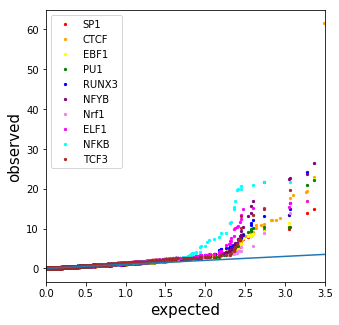

In [48]:
factors_to_plot = factors #["IRF4", "PU1", "ZEB1", "Znf143"]
#f2c = {"IRF4":"b", "PU1":'r', "ZEB1":"c", "Znf143":"k"}
#["CTCF","EBF1","SP1","PU1","RUNX3","NFYB","NRF1","ELF1","NFKB","TCF3"]
f2c = {
    "SP1": "red",
    "CTCF": "orange",
    "EBF1": "yellow",
    "PU1": "green",
    "RUNX3": "blue",
    "NFYB": "purple",
    "Nrf1": "violet",
    "ELF1": "magenta",
    "NFKB": "cyan",
    "TCF3": "brown"
}

for perc_index in [0]:
    fig = plt.figure()
    fig.set_size_inches((5, 5))
    ax = fig.add_subplot(111)
    ax.set_xlabel("expected", size=15)
    ax.set_ylabel("observed", size=15)
    ((xmin,xmax), (ymin,ymax)) = ((0, 3.5), (0, 30))
    ax.add_line(matplotlib.lines.Line2D([ymin,ymax], [ymin,ymax]))
    ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    
    s_random = [-log10(random.random()) for _ in range(int(10e6))]
    for f in f2c.keys():
        high_scored_ab = gwd[f][gwd[f]["rank"] >= rank_perc[perc_index]]
        s_high_scored_ab = high_scored_ab["MLOG10P"]
        y_points_ab = sorted(s_high_scored_ab.values.tolist())        
        x_points = sorted(s_random[:high_scored_ab.shape[0]])     
        ax.scatter(x_points, y_points_ab,  s=5, c=f2c[f], label=f)
    ax.legend(loc="upper left")
    fig.savefig("AgentBind-MultiFactor-%s.pdf"%trait)
    fig.savefig("AgentBind-MultiFactor-%s.png"%trait)
